<a href="https://colab.research.google.com/github/ithapa1/data-visualization/blob/main/Copy_of_Recreating_the_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recreating the Master**
Indra Thapa

East Central University

spring 2022

CPMSA 4213

Instructor: Dr. Nicholas Jacob 

**Abstract**: The masters are being re-created. You read it correctly; it is the precise copy and paste of the graph as much as feasible by reconstructing it from the beginning. In this project, I used my deep understanding of graphical brilliance to clean up the data and recreate the graph using several libraries. So, besides that After the code, I'll explain everything I'll be doing. The goal is to find the correct graph and data to go with it. I'm going to use a Forbes ![2020-2021 billainore](https://theenterpriseworld.com/worlds-billionaires-list-2021-forbes/)Data visualization from 2020 to 2021.

Here, I am going to take a different topic than previous one because it seems pretty easy to me and data can be found so easily. So, I would like to pick a topic about; the wealthiest person in the world from 2000 to 2021 by forbes.

![The most 10 weathiest person in the world](https://www.aei.org/wp-content/uploads/2021/03/Worlds-Top-Ten-Billionaires-2021.png)

Here, I found these picture of visualization from 2020. So, I would like to create a another great visualization with the same master piece. To do so, I need a same information of the billionaire. so, I would like to get a information from the forbes official page.![Forbes](https://www.cnn.com/2020/04/07/business/forbes-billionaire-list-2020/index.html)

besides that, The above graph looks really cool and it is also a another master piece of the visualization. So, here Jeff Bezos is leading billionaires in 2020 followed by Bill Gates. Lets see current richest person in the world.

Now, lets use the libraries that are used to do for recreating the master.

In [60]:
import numpy as np #a matrix like package for handling data
import pandas as pa #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt #a way to generate plots, histograms, bar charts, and other types of charts 
import seaborn as sns #it is based on matplotlib
import requests #HTTP library
import pandas as pd # used to manipulate data and analyze it
from bs4 import BeautifulSoup #Used for a web scraping purposes to pull the data out of HTML and XML files
import re #Used for regular expression in Python.
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox #Annotat

In [61]:
r = requests.get('https://en.wikipedia.org/wiki/The_World%27s_Billionaires')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

46

In [62]:
html_soup.title

<title>The World's Billionaires - Wikipedia</title>

In [63]:
tables = html_soup.find_all('table')
df = pa.read_html(str(tables))[5]
df

,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,1,Jeff Bezos,$131 billion,55,United States,Amazon
1,2,Bill Gates,$96.5 billion,63,United States,Microsoft
2,3,Warren Buffett,$82.5 billion,88,United States,Berkshire Hathaway
3,4,Bernard Arnault,$76 billion,70,France,LVMH
4,5,Carlos Slim,$64 billion,79,Mexico,"América Móvil, Grupo Carso"
5,6,Amancio Ortega,$62.7 billion,82,Spain,"Inditex, Zara"
6,7,Larry Ellison,$62.5 billion,74,United States,Oracle Corporation
7,8,Mark Zuckerberg,$62.3 billion,34,United States,"Facebook, Inc."
8,9,Michael Bloomberg,$55.5 billion,77,United States,Bloomberg L.P.
9,10,Larry Page,$50.8 billion,45,United States,Alphabet Inc.


Now, I am going to find the **datatype** of the Billainore.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   No.                  10 non-null     int64 
 1   Name                 10 non-null     object
 2   Net worth (USD)      10 non-null     object
 3   Age                  10 non-null     int64 
 4   Nationality          10 non-null     object
 5   Source(s) of wealth  10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


# **Are there any columns or rows that are empty?**
let's figure out wether there is any empty columns or rows.

In [65]:
df.isnull()

,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


Now, the above table looks great but I would like to clean it more by recreating the master. To do so, I would like to use the link given by the professor from where I can get idea to recreating the data. [[link](https://github.com/nurfnick/Data_Viz/blob/main/RecreatingMasters.ipynb)

Here, in the above graph I was trying to do it by Name and net worth but somehow it didn't work but it works by age though instead of Net worth. I hope this will work.

# **Need some Data Cleaning**
Now, The above graph need a lot of cleaning. I have a lot of cleaning to do on my rows and column here. As you can see, there is more information that will reduce the effectiveness of my visualization. I divided the data cleansing process into two parts.

     a.column part(Y-axis)

     b. row part(X-axis)

columns part

I need to tidy out some superfluous spaces, numerals, and notations. And the code below shows the procedure I used to clean my columns step by step. now, I am going to pull out the columns data.

In [66]:
df.columns

Index(['No.', 'Name', 'Net worth (USD)', 'Age', 'Nationality',
       'Source(s) of wealth'],
      dtype='object')

Rather than going back and looking at the names of my table columns, I'm using df.columns to get a list of all the columns in my data. We can always go back and look up the names of the columns. df.columns, on the other hand, simply saves us time and makes our job easier. so, here i can see  [], () etc. lets clean these special character.

In [67]:
cols = df.columns.map(lambda s: re.sub(r"[(.())./d]","",s))
cols

Index(['No', 'Name', 'Net worth USD', 'Age', 'Nationality',
       'Sources of wealth'],
      dtype='object')

To sanitize my data, I utilized the RegEx package. It took me a bit to find out how to do.However, it appears to be working now that the brackets have been added.

Now to use the above changes into my data. i have to do the following things. here you go..

In [68]:
df.columns = df.columns.map(lambda s: re.sub(r"[(.())./d]","",s))

In [69]:
df.columns

Index(['No', 'Name', 'Net worth USD', 'Age', 'Nationality',
       'Sources of wealth'],
      dtype='object')

In [70]:
cols1 = df.columns.map(lambda s: re.sub(r" ","",s))
cols1

Index(['No', 'Name', 'NetworthUSD', 'Age', 'Nationality', 'Sourcesofwealth'], dtype='object')

In [71]:
df.columns = df.columns.map(lambda s: re.sub(r" ","",s))

In [72]:
df.columns

Index(['No', 'Name', 'NetworthUSD', 'Age', 'Nationality', 'Sourcesofwealth'], dtype='object')

Now, I am moving towards cleaing the X_lables

In [73]:
Name = df.Name.map (lambda s: s.upper())

In [74]:
df.Name =df.Name.map(lambda s: s.upper())

In [75]:
df_sorted= df.sort_values('NetworthUSD')

In [76]:
Sourcesofwealth = df.Sourcesofwealth.map (lambda s: s.upper())

In [77]:
df.Sourcesofwealth =df.Sourcesofwealth.map(lambda s: s.upper())

In [78]:
df1=df.rename(columns={'NetworthUSD': 'Networth'}, inplace=True)
df.columns

Index(['No', 'Name', 'Networth', 'Age', 'Nationality', 'Sourcesofwealth'], dtype='object')

In [79]:
df_sorted= df.sort_values('Networth')

In [80]:
df_sorted

,No,Name,Networth,Age,Nationality,Sourcesofwealth
0,1,JEFF BEZOS,$131 billion,55,United States,AMAZON
9,10,LARRY PAGE,$50.8 billion,45,United States,ALPHABET INC.
8,9,MICHAEL BLOOMBERG,$55.5 billion,77,United States,BLOOMBERG L.P.
7,8,MARK ZUCKERBERG,$62.3 billion,34,United States,"FACEBOOK, INC."
6,7,LARRY ELLISON,$62.5 billion,74,United States,ORACLE CORPORATION
5,6,AMANCIO ORTEGA,$62.7 billion,82,Spain,"INDITEX, ZARA"
4,5,CARLOS SLIM,$64 billion,79,Mexico,"AMÉRICA MÓVIL, GRUPO CARSO"
3,4,BERNARD ARNAULT,$76 billion,70,France,LVMH
2,3,WARREN BUFFETT,$82.5 billion,88,United States,BERKSHIRE HATHAWAY
1,2,BILL GATES,$96.5 billion,63,United States,MICROSOFT


In [81]:
df['Networth'] = df['Networth'].str.strip('B') #Removing B
df['Networth'] = df['Networth'].str.strip('$') #Removing $
df['Networth'] #display variable in output

0     131 billion
1    96.5 billion
2    82.5 billion
3      76 billion
4      64 billion
5    62.7 billion
6    62.5 billion
7    62.3 billion
8    55.5 billion
9    50.8 billion
Name: Networth, dtype: object

In [82]:
df = df.dropna()

In [83]:
print(df.isnull().sum())

No                 0
Name               0
Networth           0
Age                0
Nationality        0
Sourcesofwealth    0
dtype: int64


In [84]:
df['Networth'] = df['Networth'].str.replace('billion','').astype(np.float64)
df.dtypes

No                   int64
Name                object
Networth           float64
Age                  int64
Nationality         object
Sourcesofwealth     object
dtype: object

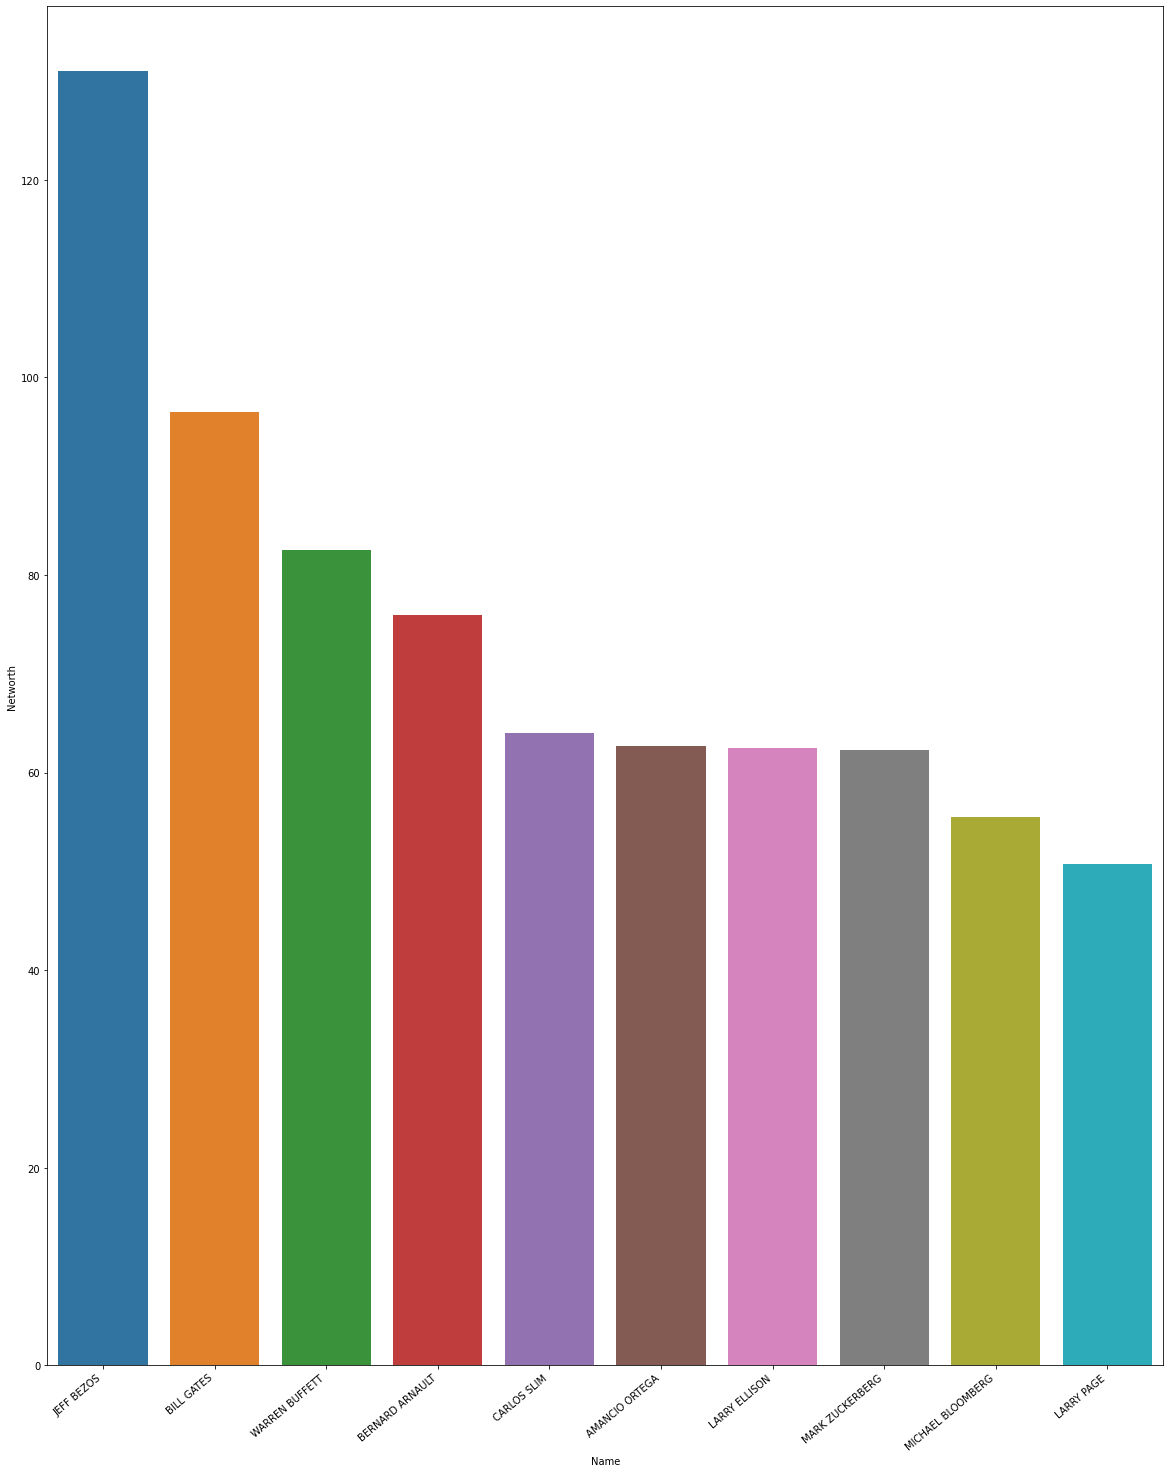

In [85]:
#Storing top 15 Billionaire in new variable
df = df.sort_values(by = ["Networth"], ascending=False).head(15)
#plotting graph
plt.figure(figsize=(20, 25))
ax = sns.barplot(x=df['Name'],y=df['Networth'],data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Now, data is ready for visualization.